In [126]:
!pip install scikit-learn
!pip install tensorflow
!pip install pandas
!pip install keras
!pip install matplotlib

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, accuracy_score

In [156]:
import pandas as pd

df = pd.read_csv('training_data.csv')

In [157]:

X = df.drop('State', axis=1)
y = df['State']

In [158]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [160]:
# Modify the model architecture
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),  # Add batch normalization layer
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = build_model(X_train_scaled.shape[1])

c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [161]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
1/1 - 7s - 7s/step - accuracy: 0.2308 - loss: 1.3682
Epoch 2/100
1/1 - 0s - 43ms/step - accuracy: 0.2692 - loss: 1.2240
Epoch 3/100
1/1 - 0s - 45ms/step - accuracy: 0.2692 - loss: 1.4100
Epoch 4/100
1/1 - 0s - 36ms/step - accuracy: 0.4615 - loss: 1.1394
Epoch 5/100
1/1 - 0s - 38ms/step - accuracy: 0.3462 - loss: 1.2752
Epoch 6/100
1/1 - 0s - 45ms/step - accuracy: 0.3077 - loss: 1.1216
Epoch 7/100
1/1 - 0s - 41ms/step - accuracy: 0.4615 - loss: 1.0958
Epoch 8/100
1/1 - 0s - 41ms/step - accuracy: 0.3846 - loss: 0.8106
Epoch 9/100
1/1 - 0s - 42ms/step - accuracy: 0.6538 - loss: 0.7755
Epoch 10/100
1/1 - 0s - 45ms/step - accuracy: 0.4615 - loss: 0.8159
Epoch 11/100
1/1 - 0s - 38ms/step - accuracy: 0.6538 - loss: 0.5495
Epoch 12/100
1/1 - 0s - 39ms/step - accuracy: 0.6538 - loss: 0.5764
Epoch 13/100
1/1 - 0s - 42ms/step - accuracy: 0.6538 - loss: 0.6711
Epoch 14/100
1/1 - 0s - 38ms/step - accuracy: 0.7692 - loss: 0.6273
Epoch 15/100
1/1 - 0s - 39ms/step - accuracy: 0.6538 - loss

In [162]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.3924, Test Accuracy: 0.8571


In [163]:
predictions = model.predict(X_test)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


In [164]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')

Accuracy: 0.8571


In [165]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 2.8321, Test Accuracy: 0.8571


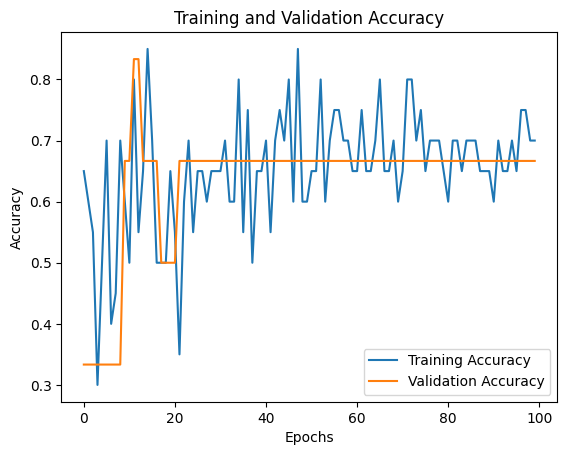

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load data
df = pd.read_csv('training_data.csv')
X = df.drop('State', axis=1)
y = df['State']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex neural network model
def build_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_shape,)),
        Dropout(0.4),  # Adjusted dropout rate
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = build_model(X_train_scaled.shape[1])

# Train the model with early stopping to prevent overfitting
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training and validation curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()